# Predict the region of origin by analyzing tweet content using machine learning classifier
 - the model extracts english language variations specific to the region and uses it to determine geographical origin of the author

In [75]:
# import librairies
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
import random

# Load and explore the dataset

In [4]:
df = pd.read_csv('Twitter_by_City.gz', index_col = 0)

In [5]:
df.head()

,City,Text
0,auckland,i m sorry who didn t vote beige show me these...
1,auckland,meet our analysts idc australia new zealand a...
2,auckland,aue my great grandfather was an aboriginal te...
3,auckland,yeah dumping corsica would be a good idea tot...
4,auckland,thank you for your partnership to help get de...


In [36]:
print(f'There are {df.shape[0]} tweets in the dataset')

There are 373128 tweets in the dataset


In [28]:
city_data = []
for city, df_by_city in df.groupby('City'):
    city_data.append([city,len(df_by_city)])
df_cities = pd.DataFrame(city_data, columns=['City', 'tweets'], index=None)
df_cities.set_index("City", drop = True, inplace = True)
df_cities

,tweets
City,
auckland,20717
chicago,62626
delhi,45029
hong_kong,17836
jakarta,8394
johannesburg,51009
london,68728
melbourne,29354
paris,9022


Number of tweets by city


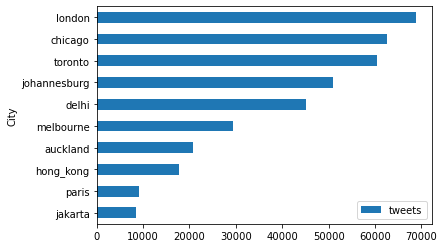

In [33]:
print('Number of tweets by city')
df_cities.sort_values(by=['tweets']).plot(kind='barh')
plt.show()

# Features extraction
- we will use tf-idf weighting to extract the key linguistic specificities and reduce the influence of english commonalities accross the dataset
- we will use 90% of the dataset for training and reserve 10% for testing
- the features will be extracted from the train set since we do not want the model to have ANY information on the test set

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input = "content", encoding = "utf-8", decode_error = "replace", ngram_range = (1, 1), norm = "l2", use_idf = True, smooth_idf = True, tokenizer = None)

In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.Text, df.City, test_size=0.1 )

In [40]:
vectorizer.fit(xtrain)

TfidfVectorizer(decode_error='replace')

In [119]:
print('size of the vocabulary: ', len(vectorizer.vocabulary_))

size of the vocabulary:  926833


In [41]:
vectorizer.vocabulary_

{'hair': 322827,
 'looks': 463269,
 'great': 311656,
 'everything': 249380,
 'else': 235459,
 'is': 379791,
 'stunning': 763162,
 'as': 46793,
 'always': 26475,
 'hr': 350212,
 'for': 275262,
 'amp': 29870,
 'so': 739461,
 'far': 258595,
 'but': 117487,
 'coming': 157944,
 'back': 61767,
 'you': 899055,
 'after': 13186,
 'day': 186653,
 'job': 397569,
 'this': 798652,
 'not': 564257,
 'who': 876150,
 'we': 869306,
 'are': 42845,
 'it': 382265,
 'literally': 457900,
 'did': 202500,
 'hit': 341863,
 'your': 899629,
 'fucking': 283312,
 'head': 331746,
 'oh': 575029,
 'please': 618874,
 'spare': 746726,
 'me': 496321,
 'right': 672536,
 'wing': 879445,
 'idiocy': 358996,
 'once': 578939,
 'the': 793669,
 'same': 690429,
 'marriage': 486984,
 'law': 445219,
 'applies': 40300,
 'to': 806807,
 'gay': 292423,
 'or': 583275,
 'straight': 760444,
 'coup': 168870,
 'hahaha': 321948,
 'asians': 48359,
 'love': 465196,
 'im': 363298,
 'oogled': 580924,
 'by': 118869,
 'them': 795307,
 'they': 7975

#### vectorize the text content of the tweets in order to train the classifier
- this step generates weighted vectors usign tf-idf for each of the tweets. This transforms the text information into numbers usable by the algorithm

In [43]:
x_train = vectorizer.transform(xtrain)
x_test = vectorizer.transform(xtest)

In [121]:
print('shape of the matrix of vectors: number of tweets (90% of total dataset) x vector dimension over vocabulary')
x_train.shape

shape of the matrix of vectors: number of tweets (90% of total dataset) x vector dimension over vocabulary


(335815, 926833)

# Train classifier
- the model will be trained to correctly classify the english-speaking region from a given tweet
- There are 10 possible cities (labels). a random classifier would reach 10% accuracy. Givent eh dataset imbalance, a classifier always predicting the majority class ('London') would achieve just over 20% accuracy
- Note that we are not performing any text preprocessing such as cleaning and removing stopwords.

In [45]:
from sklearn.svm import LinearSVC
model = LinearSVC(penalty = "l2", loss = "squared_hinge", dual = True, tol = 0.0001, C = 1.0, multi_class = "ovr", fit_intercept = True, intercept_scaling = 1, max_iter = 200000)

In [48]:
model.fit(x_train,ytrain)

LinearSVC(max_iter=200000)

# Test and evaluate classifier

In [49]:
predictions = model.predict(x_test)

In [51]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

    auckland       0.99      0.97      0.98      2130
     chicago       0.97      0.99      0.98      6277
       delhi       1.00      1.00      1.00      4448
   hong_kong       0.99      0.96      0.97      1771
     jakarta       0.99      0.99      0.99       820
johannesburg       1.00      1.00      1.00      5064
      london       0.98      0.99      0.99      6845
   melbourne       0.98      0.98      0.98      2935
       paris       0.98      0.94      0.96       893
     toronto       0.98      0.97      0.97      6130

    accuracy                           0.98     37313
   macro avg       0.99      0.98      0.98     37313
weighted avg       0.98      0.98      0.98     37313



# Sample predictions

In [52]:
xtest

166988     im just messing with linda lol toka is around...
68467      it s been a whole year and i still live in re...
15139      travel safely my dude lovely meeting you brie...
150732     i voted for the top social artist award ayo a...
191486     can we just go back to how nige got dragged i...
                                ...                        
317489     yet the way u played shrikrishna no one did s...
146700     kpk raids offices of bpk and transmigration m...
201505     the last person to tell me that cancelled me ...
275587     it won t be a lottery pick because the east i...
371538     only scanning this right now but the yang arg...
Name: Text, Length: 37313, dtype: object

In [113]:
index = random.sample(list(xtest.index), k=1)[0]
print(f'====================== Prediction for tweet n°{index} ===============================')
print(xtest[index])
print()
print(f'True label --------> {ytest[index]}')
print(f'Predicted label ---> {model.predict(vectorizer.transform([xtest[index]]))[0]}')

====================== Prediction for tweet n°183448 ===============================
 justin trudeau is a respected young leaders i had an awesome time at the vip fitness event with thank you see you soon english thanks for shopping with us enjoy your day satafrikan plastic p s please add some more giphs to the list store thank you let me pin this tweet i need to see it everyday calling all food related smmes restaurants franchises franchisees and others we can bruuu lapho she is the last to speak sesimyekile enama scandal amangaka last year she embraced our stage with her perfomance she s a presenter of a dance show on who is it engage craft beer trash if you couldn t find a real beer then maybe stick to ciders yo this one has rich flavour with a ful you should have said my girlfriend is on fire you are defending white supremacy according to your statistics how many rich black people in the world compared to retweeted black canary i follow back instantly he and rabada are the future o

In [114]:
index = random.sample(list(xtest.index), k=1)[0]
print(f'====================== Prediction for tweet n°{index} ===============================')
print(xtest[index])
print()
print(f'True label --------> {ytest[index]}')
print(f'Predicted label ---> {model.predict(vectorizer.transform([xtest[index]]))[0]}')

====================== Prediction for tweet n°146918 ===============================
 everything is okay in the end if it s not ok then it s not the end you don t have to be great to get started but you do have to get started to be great not forgiving is like drinking poison and expecting the other person to die the first to apologize is the bravest the first to forgive is the strongest the first to move forward is the happiest they did to hobi jimin and jk but mostly to jk i remember when i found them i was like for god s sake why there s no shame in admitting you re wrong it s better than letting a mistake go on doing damage don t let anyone s ignorance hate drama or negativity stop you from being the best person you can be respect others help others love others these are the keys that unlock our soul stay true to those people that you hold dearest cherish those connections and do everything you can to keep them strong nonton the shack film subtitle indonesia streaming movie download

# Conclusion
- the performance is evaluated on 10% of the total dataset, ie over 37k tweets. These are unseen data.
- although the dataset not not balanced (some cities more represented than others), the model has sufficient samples to extract key variation features depending on the english-speaking region
- the simple classifier achieved excellent F1 score and therefore very good precision and recall metrics on all cities
- the overall accuracy is 98% and summarizies the excellent performance accross the geographies